### The following reads in the meta data file and adds columns for emoji information: 

- does the column contain emojis?
- a list of emojis contained within

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [137]:
pip install emoji --upgrade

Requirement already up-to-date: emoji in /opt/anaconda3/lib/python3.7/site-packages (0.5.4)
Note: you may need to restart the kernel to use updated packages.


In [138]:
from emoji import UNICODE_EMOJI
import emoji

In [139]:
#Read in the updated metadata file
spotify_meta = pd.read_csv("../metadata_w_categories_wordcount.csv")

In [140]:
spotify_meta.head(2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,show_uri,show_name,show_description,publisher,language,rss_link,episode_uri,...,episode_filename_prefix,Categories,SubCategories,Keywords,Explicit,lc,show_lc,Episode_count,length,lexical_diversity
0,0,0,0,spotify:show:2NYtxEZyYelR6RMKmjfPLB,Kream in your Koffee,A 20-something blunt female takes on the world...,Katie Houle,['en'],https://anchor.fm/s/11b84b68/podcast/rss,spotify:episode:000A9sRBYdVh66csG2qEdj,...,000A9sRBYdVh66csG2qEdj,['Leisure'],[0],0,yes,1.055556,1.000000,3,5012,3.817212
1,1,1,1,spotify:show:15iWCbU7QoO23EndPEO6aN,Morning Cup Of Murder,Ever wonder what murder took place on today in...,Morning Cup Of Murder,['en'],https://anchor.fm/s/b07181c/podcast/rss,spotify:episode:000HP8n3hNIfglT2wSI2cA,...,000HP8n3hNIfglT2wSI2cA,['True Crime'],[0],0,yes,1.407895,1.179487,180,6618,5.651580


In [142]:
#STEP 1: Add emoji columns

In [143]:
def is_emoji(s):
    return s in UNICODE_EMOJI

In [144]:
#Write a function to take in a column name 
#that outputs a list of TRUE/FALSE 
#to answer: does the column contain emojis?

def column_contains_emojis(df, column, nulls):
    #Set up list to contain True and False values, default value of False
    TF_emojis = [False for i in range(len(df))]
    
    for i in range(len(df)):
        phrase = df.iloc[i][column]
        
        if nulls[i] == False:
            for letter in phrase:
                if is_emoji(letter):
                    TF_emojis[i]=True
                    break
                
    return TF_emojis


In [145]:
show_name_nulls= spotify_meta['show_name'].isnull()

show_desc_nulls= spotify_meta['show_description'].isnull()

episode_desc_nulls= spotify_meta['episode_description'].isnull()

In [146]:
#Add TRUE/FALSE column for show name
spotify_meta['show_name_contains_emojis']=column_contains_emojis(spotify_meta, 'show_name', show_name_nulls)

In [147]:
#Add TRUE/FALSE column for show description
spotify_meta['show_desc_contains_emojis']=column_contains_emojis(spotify_meta, 'show_description', show_desc_nulls)

In [148]:
#Add TRUE/FALSE column for show description
spotify_meta['episode_desc_contains_emojis']=column_contains_emojis(spotify_meta, 'episode_description', episode_desc_nulls)

In [149]:
spotify_meta.head(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,show_uri,show_name,show_description,publisher,language,rss_link,episode_uri,...,Keywords,Explicit,lc,show_lc,Episode_count,length,lexical_diversity,show_name_contains_emojis,show_desc_contains_emojis,episode_desc_contains_emojis
0,0,0,0,spotify:show:2NYtxEZyYelR6RMKmjfPLB,Kream in your Koffee,A 20-something blunt female takes on the world...,Katie Houle,['en'],https://anchor.fm/s/11b84b68/podcast/rss,spotify:episode:000A9sRBYdVh66csG2qEdj,...,0,yes,1.055556,1.000000,3,5012,3.817212,False,False,False
1,1,1,1,spotify:show:15iWCbU7QoO23EndPEO6aN,Morning Cup Of Murder,Ever wonder what murder took place on today in...,Morning Cup Of Murder,['en'],https://anchor.fm/s/b07181c/podcast/rss,spotify:episode:000HP8n3hNIfglT2wSI2cA,...,0,yes,1.407895,1.179487,180,6618,5.651580,False,False,False
2,2,2,2,spotify:show:6vZRgUFTYwbAA79UNCADr4,Inside The 18 : A Podcast for Goalkeepers by G...,Inside the 18 is your source for all things Go...,Inside the 18 GK Media,['en'],https://anchor.fm/s/81a072c/podcast/rss,spotify:episode:001UfOruzkA3Bn1SPjcdfa,...,0,no,1.142857,1.035714,80,4682,3.129679,False,False,False


In [150]:
spotify_meta['show_name_contains_emojis'].value_counts()

False    104930
True        430
Name: show_name_contains_emojis, dtype: int64

In [151]:
spotify_meta['show_desc_contains_emojis'].value_counts()

False    102790
True       2570
Name: show_desc_contains_emojis, dtype: int64

In [152]:
spotify_meta['episode_desc_contains_emojis'].value_counts()

False    101539
True       3821
Name: episode_desc_contains_emojis, dtype: int64

In [153]:
#Write a function that takes in a column name 
#and outputs a list of emojis contained in that column

def column_emojis(df, column, nulls):
    #Set up list for the column
    emojis_list = []
    
    for i in range(len(df)):
        phrase = df.iloc[i][column]
        
        emojis=[]
        if nulls[i] == False:
            #Check if letter is an emoji, if yes then add to list
            emojis=[letter for letter in phrase if letter in UNICODE_EMOJI]
        
        emojis_list.append(emojis)
        
    return emojis_list
        

In [154]:
#Add emoji column for show name
spotify_meta['show_name_emojis']=column_emojis(spotify_meta, 'show_name', show_name_nulls)

In [155]:
#Add emoji column for show description
spotify_meta['show_desc_emojis']=column_emojis(spotify_meta, 'show_description', show_desc_nulls)

In [156]:
#Add emoji column for episode description
spotify_meta['episode_desc_emojis']=column_emojis(spotify_meta, 'episode_description', episode_desc_nulls)

In [157]:
spotify_meta.loc[spotify_meta['show_name_contains_emojis'] == True]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,show_uri,show_name,show_description,publisher,language,rss_link,episode_uri,...,show_lc,Episode_count,length,lexical_diversity,show_name_contains_emojis,show_desc_contains_emojis,episode_desc_contains_emojis,show_name_emojis,show_desc_emojis,episode_desc_emojis
170,170,170,170,spotify:show:2wulZL0Uf2VYUYteNtY5hm,Maria Kamon©™ @MKPDE Podcast,Let's talk... Events Meetings Weddings Plannin...,Maria Kamon©™ @MKPDE,['en'],https://anchor.fm/s/b38da0/podcast/rss,spotify:episode:00kCKbSKV6h8ZWoT2gnnou,...,1.045455,1,7564,4.137856,True,False,False,"[©, ™]",[],[]
176,176,176,176,spotify:show:4DuuXfh3SDHctUMPfUeEYZ,Dominating EDGE™ - Law of Attraction,Simple Dominating EDGE™ teachings to attract a...,Jeff Hammer,['en-US'],https://anchor.fm/s/894fedc/podcast/rss,spotify:episode:00mcCahFft4A5h9J2TFCSl,...,1.000000,124,7042,3.837602,True,True,False,[™],[™],[]
450,450,450,450,spotify:show:5ueyekcDdst5X5ntxReUz8,😀😀😀 PositiveVibes 24/7 😀😀😀,PositiveVibes Only,PositiveVibes,['en-US'],https://anchor.fm/s/26f0a70/podcast/rss,spotify:episode:020oObZiqV71atGTMW7qfJ,...,1.000000,6,5184,3.837158,True,False,False,"[😀, 😀, 😀, 😀, 😀, 😀]",[],[]
877,877,877,877,spotify:show:2uLJaA2RnswQRGBoxmYlgn,PALM TREES AND DRUGS 🌴🚀,"Recovery podcast on hope, rawness of addiction...",Drew O’Connell,['en'],https://anchor.fm/s/1162fc58/podcast/rss,spotify:episode:040lr5KQX1OfMj8QjXYl9L,...,1.111111,4,1393,2.763889,True,False,False,"[🌴, 🚀]",[],[]
1318,1318,1318,1318,spotify:show:097uvXgvqJnKfNMvYLCbDV,Take A Ride🎢: Fantasy Basketball,A Fantasy Basketball Dynasty Podcast with Poin...,Dynasty Basketball,['en'],https://anchor.fm/s/707dbac/podcast/rss,spotify:episode:064gyVFzXSDQysJ1yI4Px1,...,1.093750,14,5580,2.570244,True,False,True,[🎢],[],[😐]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103169,103169,103169,103169,spotify:show:1EEOr7M8rdyIlUfCrC8Q0o,The Prat Show✨ - Your Way To Happiness,"Hey! I'm Pratishtha, a Psychology graduate bas...",Pratishtha Patny,['en'],https://anchor.fm/s/1137f648/podcast/rss,spotify:episode:7pXY2xwL7bc7fp7hxNtEvx,...,1.130435,3,3645,2.819026,True,True,True,[✨],"[💞, 💞, 💃]","[✨, 😊, 😁]"
103548,103548,103548,103548,spotify:show:321HBCMRglxVUIjJeeqAzQ,Dude Fuel™ — Motivation for Life,Get motivated. Become inspired. Live a #NextLe...,Cody Ray Miller,['en'],https://anchor.fm/s/796bbd8/podcast/rss,spotify:episode:7rK275KdvB0ImHVFi5TwUq,...,1.000000,32,3541,4.215476,True,False,False,[™],[],[]
103553,103553,103553,103553,spotify:show:4DuuXfh3SDHctUMPfUeEYZ,Dominating EDGE™ - Law of Attraction,Simple Dominating EDGE™ teachings to attract a...,Jeff Hammer,['en-US'],https://anchor.fm/s/894fedc/podcast/rss,spotify:episode:7rMaEwhK2yCBNLI6Xu3l3F,...,1.000000,124,3471,3.926471,True,True,False,[™],[™],[]
104633,104633,104633,104633,spotify:show:49kdPjStUfJvt3Z6yLHETj,Satisfy My Gemini - High-Vibe Astrology- A Met...,Welcome to Satisfy My Gemini- a conversational...,Satisfy My Gemini,['en'],https://anchor.fm/s/6f81c08/podcast/rss,spotify:episode:7wbVk0Pn7gDSO9vieZotdp,...,1.000000,10,5950,4.514416,True,True,True,[✨],"[✨, ✨, ✨]","[✨, ✨]"


In [158]:
spotify_meta.loc[spotify_meta['show_desc_contains_emojis'] == True]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,show_uri,show_name,show_description,publisher,language,rss_link,episode_uri,...,show_lc,Episode_count,length,lexical_diversity,show_name_contains_emojis,show_desc_contains_emojis,episode_desc_contains_emojis,show_name_emojis,show_desc_emojis,episode_desc_emojis
3,3,3,3,spotify:show:5BvKEjaMSuvUsGROGi2S7s,Arrowhead Live!,Your favorite podcast for everything @Chiefs! ...,Arrowhead Live!,['en-US'],https://anchor.fm/s/917dba4/podcast/rss,spotify:episode:001i89SvIQgDuuyC53hfBm,...,1.000000,14,1903,2.798529,False,True,False,[],[🎙],[]
16,16,16,16,spotify:show:60IuLVDLnoXURGVdY2eHLt,MOMHOOD,Because there’s a million ways to mom 😏 A comm...,Orly Shani + Brandi Milloy,['en'],https://anchor.fm/s/100ded04/podcast/rss,spotify:episode:004scar91tc5UcMpthhoCG,...,1.292683,13,3335,3.772624,False,True,False,[],[😏],[]
68,68,68,68,spotify:show:0wsU0Os7260KnkoitaMfQZ,Higher Spirits Podcast,"Welcome to the Higher Spirits Podcast, hosted ...",Higher Spirits,['en'],https://anchor.fm/s/bb633d8/podcast/rss,spotify:episode:00HvSiSFnGsS3ZbR0U7LpV,...,1.060000,8,181,1.265734,False,True,False,[],[🔥],[]
75,75,75,75,spotify:show:65tFpuBodBJAokryEYlhF3,Just the Zoo of Us,"Join us, Christian and Ellen Weatherford, whil...",Christian & Ellen Weatherford,['en'],https://anchor.fm/s/b48cdfc/podcast/rss,spotify:episode:00Le5AuqCKplHPI8FQMNPF,...,1.312500,25,2501,3.402721,False,True,False,[],"[😊, 😊]",[]
98,98,98,98,spotify:show:1OnmlETsX0Hkxhg84j4AJd,REDONKULOUS,Prescribing laugh therapy and sharing crazy sh...,Redonkulous Team,['en'],https://anchor.fm/s/de38b88/podcast/rss,spotify:episode:00TtwF222Yhmot5vblQ7PS,...,1.208333,3,6549,4.599017,False,True,False,[],"[❤, ❤]",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105293,105293,105293,105293,spotify:show:4DuuXfh3SDHctUMPfUeEYZ,Dominating EDGE™ - Law of Attraction,Simple Dominating EDGE™ teachings to attract a...,Jeff Hammer,['en-US'],https://anchor.fm/s/894fedc/podcast/rss,spotify:episode:7zkzC8XSrYSyaIG4jCmmKF,...,1.000000,124,5645,3.618590,True,True,False,[™],[™],[]
105303,105303,105303,105303,spotify:show:1OnmlETsX0Hkxhg84j4AJd,REDONKULOUS,Prescribing laugh therapy and sharing crazy sh...,Redonkulous Team,['en'],https://anchor.fm/s/de38b88/podcast/rss,spotify:episode:7zmJ6jaCSpzLXm4n7UY5pJ,...,1.208333,3,4551,4.281279,False,True,False,[],"[❤, ❤]",[]
105327,105327,105327,105327,spotify:show:45CMS6ChcAu6rITRc8CBc0,MSUSportsPodcast,A Michigan State sports podcast where I discus...,Msusportszone,['en'],https://anchor.fm/s/a18a45c/podcast/rss,spotify:episode:7zsN0YAqwEN7PXaCxxSHuY,...,1.368421,41,6178,3.690562,False,True,False,[],"[‼, ‼]",[]
105329,105329,105329,105329,spotify:show:1sjDXm1VVPoA0tMZRyuxqU,LoosTalk Podcast,"Hosted by Kamzy, Jay & MrTetts. Introducing #...",LoosTalk Podcast,['en'],https://anchor.fm/s/93d3d2c/podcast/rss,spotify:episode:7zsqNvvdwK9YAW6uH7vVsI,...,1.621622,11,3860,2.827839,False,True,False,[],"[🙈, 🙉, 🙊, 😭, 😨, ☠]",[]


In [160]:
spotify_meta.loc[spotify_meta['episode_desc_contains_emojis'] == True]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,show_uri,show_name,show_description,publisher,language,rss_link,episode_uri,...,show_lc,Episode_count,length,lexical_diversity,show_name_contains_emojis,show_desc_contains_emojis,episode_desc_contains_emojis,show_name_emojis,show_desc_emojis,episode_desc_emojis
63,63,63,63,spotify:show:2sm2Zy4WlM8ZRimItjWXCS,Neuroscience for Success | Klyn Elsbury,"Rewire your brain with Klyn Elsbury, a leading...",Klyn,['en'],https://anchor.fm/s/e1825f0/podcast/rss,spotify:episode:00HGWXIxjcnIUlnwjr43Qt,...,1.065574,3,212,1.350318,False,False,True,[],[],"[🤔, 🧠, 🦈, 📈]"
78,78,78,78,spotify:show:4053MooFmLA18LOnZvJtsJ,The Guava Girl Podcast by Isabella Silverio,The Guava Girl Podcast was created with the pu...,Isabella Silverio,['en'],https://anchor.fm/s/30d34ac/podcast/rss,spotify:episode:00LwGCHIXb0qTihKoB4Ofc,...,1.133333,43,5463,4.241460,False,False,True,[],[],"[😛, 👇]"
129,129,129,129,spotify:show:0BdHyPOixaq9nqBQisIwe3,Girl On Top: ShallonXO,What happens when you mix Carrie Bradshaw with...,Shallon Lester & Studio71,['en-US'],https://anchor.fm/s/8fb0664/podcast/rss,spotify:episode:00cpOS24Y5536ZbzDirP3K,...,1.115942,37,1795,2.157452,False,True,True,[],"[♥, ♥, ♥]","[💜, 💜, 💜, 💜, 💜, 💜]"
162,162,162,162,spotify:show:7HUq1K3DMvcZHCv0D8YzZr,Emma’s Diary from the Road,THIS IS MY DIARY FROM THE ROAD. Follow the adv...,Emma Willmann,['en'],https://anchor.fm/s/89eeca8/podcast/rss,spotify:episode:00io2ujE4FxnnEXIFhrQgv,...,1.000000,10,1384,2.326050,False,False,True,[],[],"[💖, 💖, 💖]"
166,166,166,166,spotify:show:5JVDiUSPwm9d2evc05x1ZX,The Lyndsey Morrison Podcast,This Podcast is for Group Fitness Instructors....,Lyndsey Morrison,['en-US'],https://anchor.fm/s/91ec018/podcast/rss,spotify:episode:00jXqjuurv2nqhOdWh8ZH3,...,1.333333,8,1515,2.700535,False,False,True,[],[],[😍]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105088,105088,105088,105088,spotify:show:5tI4lE72QQxACCdh20tMVa,Seeds of the Divine: We Are All We Need,This podcast explores the intricacies of the U...,Maeden Jewell,['en'],https://anchor.fm/s/e913940/podcast/rss,spotify:episode:7yoaxAPNFDAkCxMK2CyBNi,...,1.065217,1,7630,4.073679,False,False,True,[],[],[✨]
105105,105105,105105,105105,spotify:show:6R5ktHYRdfrm1ePuPcHeBe,Storytime with Jane,Listen to a new children’s storybook every day...,Jane,['en'],https://anchor.fm/s/126503d0/podcast/rss,spotify:episode:7yuWjj1pMxVkLH33xDA7sX,...,1.342857,9,3346,4.182500,False,False,True,[],[],"[🏴, ☠, 👑, 📚]"
105266,105266,105266,105266,spotify:show:6H7CLh4pktyNSK2JFcPFTD,Starry Alignment: The Daily Horoscope Podcast ...,This podcast is for those that believe in divi...,Stevie Medina,['en'],https://anchor.fm/s/70da35c/podcast/rss,spotify:episode:7zeiHjeiuGte9qkCqnoZBE,...,1.057692,259,1123,2.457330,False,False,True,[],[],[🎶]
105342,105342,105342,105342,spotify:show:57SPJNbS0Inz1aylmVHPWk,Cosmic Angel 555,"Hello, I'm Hazel Halite a ascension coach & In...",Cosmic Angel 555,['en'],https://anchor.fm/s/692209c/podcast/rss,spotify:episode:7zwnmfB5JRlHkquLgKz8f7,...,1.157895,125,7134,5.177068,False,False,True,[],[],[♓]


In [162]:
spotify_meta.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'show_uri', 'show_name',
       'show_description', 'publisher', 'language', 'rss_link', 'episode_uri',
       'episode_name', 'episode_description', 'duration',
       'show_filename_prefix', 'episode_filename_prefix', 'Categories',
       'SubCategories', 'Keywords', 'Explicit', 'lc', 'show_lc',
       'Episode_count', 'length', 'lexical_diversity',
       'show_name_contains_emojis', 'show_desc_contains_emojis',
       'episode_desc_contains_emojis', 'show_name_emojis', 'show_desc_emojis',
       'episode_desc_emojis'],
      dtype='object')

In [165]:
#STEP 2 = drop columns with redundant info

spotify_meta = spotify_meta.drop(columns=['Unnamed: 0.1', 'Unnamed: 0.1.1'])

In [166]:
spotify_meta.head(2)

,Unnamed: 0,show_uri,show_name,show_description,publisher,language,rss_link,episode_uri,episode_name,episode_description,...,show_lc,Episode_count,length,lexical_diversity,show_name_contains_emojis,show_desc_contains_emojis,episode_desc_contains_emojis,show_name_emojis,show_desc_emojis,episode_desc_emojis
0,0,spotify:show:2NYtxEZyYelR6RMKmjfPLB,Kream in your Koffee,A 20-something blunt female takes on the world...,Katie Houle,['en'],https://anchor.fm/s/11b84b68/podcast/rss,spotify:episode:000A9sRBYdVh66csG2qEdj,1: It’s Christmas Time!,On the first ever episode of Kream in your Kof...,...,1.000000,3,5012,3.817212,False,False,False,[],[],[]
1,1,spotify:show:15iWCbU7QoO23EndPEO6aN,Morning Cup Of Murder,Ever wonder what murder took place on today in...,Morning Cup Of Murder,['en'],https://anchor.fm/s/b07181c/podcast/rss,spotify:episode:000HP8n3hNIfglT2wSI2cA,The Goleta Postal Facility shootings- January ...,"See something, say something. It’s a mantra ma...",...,1.179487,180,6618,5.651580,False,False,False,[],[],[]


In [167]:
#STEP 1: Change column names

spotify_meta = spotify_meta.rename(columns={"lc": "ep_desc_lc", "show_lc": "show_desc_lc", "length": "transcript_length", "lexical_diversity": "transcript_lc"})

In [169]:
spotify_meta.columns

Index(['Unnamed: 0', 'show_uri', 'show_name', 'show_description', 'publisher',
       'language', 'rss_link', 'episode_uri', 'episode_name',
       'episode_description', 'duration', 'show_filename_prefix',
       'episode_filename_prefix', 'Categories', 'SubCategories', 'Keywords',
       'Explicit', 'ep_desc_lc', 'show_desc_lc', 'Episode_count',
       'transcript_length', 'transcript_lc', 'show_name_contains_emojis',
       'show_desc_contains_emojis', 'episode_desc_contains_emojis',
       'show_name_emojis', 'show_desc_emojis', 'episode_desc_emojis'],
      dtype='object')

In [170]:
spotify_meta.to_csv('metadata_v5.csv', index=False)

Now to check the distribution of emojis!

In [81]:
#Goal is to create a dictionary that will have emojis
#as the keys and their count as the value. 

In [85]:
show_name_emoji_count = {}

for i in range(len(spotify_meta)):
    for emoji in spotify_meta.iloc[i]['show_name_emojis']:
        show_name_emoji_count[emoji] = show_name_emoji_count.get(emoji, 0) + 1

In [98]:
show_desc_emoji_count = {}

for i in range(len(spotify_meta)):
    for emoji in spotify_meta.iloc[i]['show_desc_emojis']:
        show_desc_emoji_count[emoji] = show_desc_emoji_count.get(emoji, 0) + 1

In [101]:
episode_desc_emoji_count = {}

for i in range(len(spotify_meta)):
    for emoji in spotify_meta.iloc[i]['episode_desc_emojis']:
        episode_desc_emoji_count[emoji] = episode_desc_emoji_count.get(emoji, 0) + 1

In [109]:
#episode_desc_emoji_count

In [110]:
ed_emoji_sorted= sorted(episode_desc_emoji_count.items(), key=lambda kv: kv[1], reverse=True)

In [132]:
ed_emoji_sorted

[('➖', 559),
 ('👉', 536),
 ('❤', 383),
 ('✨', 324),
 ('⭐', 294),
 ('💜', 293),
 ('🎶', 279),
 ('🔥', 269),
 ('®', 235),
 ('👍', 184),
 ('👇', 178),
 ('🎙', 162),
 ('📸', 155),
 ('🏻', 149),
 ('🙏', 147),
 ('🏽', 146),
 ('🙌', 141),
 ('©', 139),
 ('😂', 139),
 ('🌟', 139),
 ('♥', 126),
 ('💛', 123),
 ('🏼', 119),
 ('🚨', 118),
 ('🏈', 115),
 ('✅', 112),
 ('👈', 111),
 ('➡', 102),
 ('🐤', 97),
 ('🌈', 97),
 ('🏾', 92),
 ('💪', 87),
 ('▶', 87),
 ('♀', 82),
 ('💕', 81),
 ('🔴', 80),
 ('😊', 76),
 ('🏆', 74),
 ('🎧', 71),
 ('👀', 69),
 ('™', 67),
 ('😉', 65),
 ('🔗', 64),
 ('⚡', 64),
 ('🤔', 63),
 ('👨', 63),
 ('🖤', 63),
 ('📚', 63),
 ('👆', 62),
 ('💰', 59),
 ('🔮', 58),
 ('💖', 56),
 ('🌹', 56),
 ('♂', 56),
 ('〰', 54),
 ('🚀', 54),
 ('📲', 53),
 ('💸', 51),
 ('🌖', 50),
 ('🐸', 49),
 ('💯', 49),
 ('👻', 48),
 ('😎', 47),
 ('🐶', 46),
 ('👑', 46),
 ('🐱', 44),
 ('🤣', 43),
 ('🔹', 43),
 ('💙', 41),
 ('🐥', 40),
 ('🧡', 40),
 ('📷', 40),
 ('📱', 40),
 ('👏', 39),
 ('💗', 39),
 ('✔', 38),
 ('📣', 37),
 ('📹', 37),
 ('🤷', 37),
 ('💋', 34),
 ('🗣', 34),


In [116]:
emoji.demojize(ed_emoji_sorted[0][0])

':heavy_minus_sign:'

In [96]:
#some code from stack exchange to help order my list of emojis
sn_emoji_sorted = sorted(show_name_emoji_count.items(), key=lambda kv: kv[1], reverse=True)

In [133]:
sn_emoji_sorted

[('™', 214),
 ('😀', 36),
 ('✨', 34),
 ('🖤', 17),
 ('🎬', 16),
 ('©', 15),
 ('🎢', 14),
 ('♍', 13),
 ('®', 13),
 ('💰', 12),
 ('🚭', 12),
 ('🏾', 12),
 ('😎', 11),
 ('📻', 11),
 ('😉', 11),
 ('👆', 11),
 ('📚', 11),
 ('👑', 11),
 ('📷', 11),
 ('🎤', 11),
 ('💎', 11),
 ('🎩', 11),
 ('📦', 11),
 ('🕉', 11),
 ('🔝', 11),
 ('🐶', 11),
 ('🔴', 11),
 ('⚫', 11),
 ('❤', 10),
 ('🌈', 8),
 ('💕', 7),
 ('🚇', 6),
 ('🎙', 5),
 ('🌴', 4),
 ('🚀', 4),
 ('☕', 4),
 ('💋', 4),
 ('📡', 4),
 ('🧠', 4),
 ('🎼', 4),
 ('💖', 4),
 ('💜', 3),
 ('💫', 3),
 ('♂', 3),
 ('❌', 3),
 ('🤩', 3),
 ('🐳', 3),
 ('🦄', 2),
 ('💙', 2),
 ('🕯', 2),
 ('🦋', 2),
 ('🤷', 2),
 ('🏽', 2),
 ('🍦', 2),
 ('🍬', 2),
 ('🇬', 2),
 ('🇧', 2),
 ('🚐', 2),
 ('👊', 2),
 ('😍', 2),
 ('💦', 2),
 ('🔒', 1),
 ('✈', 1),
 ('💍', 1),
 ('🙏', 1),
 ('🕊', 1),
 ('☁', 1),
 ('💬', 1),
 ('🌳', 1),
 ('🗣', 1),
 ('🛹', 1),
 ('🍃', 1),
 ('🌿', 1),
 ('🍀', 1),
 ('💨', 1),
 ('🥊', 1),
 ('🍾', 1),
 ('🍹', 1),
 ('👻', 1),
 ('🥺', 1),
 ('💔', 1),
 ('💛', 1),
 ('🌻', 1),
 ('🍯', 1),
 ('🍋', 1),
 ('🍓', 1),
 ('🍒', 1),
 ('🥝', 1),
 (

In [118]:
emoji.demojize(sn_emoji_sorted[0][0])

':trade_mark:'

In [119]:
#some code from stack exchange to help order my list of emojis
sd_emoji_sorted = sorted(show_desc_emoji_count.items(), key=lambda kv: kv[1], reverse=True)

In [134]:
sd_emoji_sorted

[('✨', 519),
 ('👉', 449),
 ('🏼', 313),
 ('😊', 252),
 ('™', 217),
 ('❤', 203),
 ('♥', 182),
 ('🌹', 169),
 ('🌍', 147),
 ('😉', 106),
 ('🎙', 99),
 ('🏻', 91),
 ('‼', 91),
 ('🎵', 82),
 ('⭐', 78),
 ('✌', 76),
 ('®', 71),
 ('🏾', 70),
 ('💯', 69),
 ('©', 64),
 ('👍', 64),
 ('💩', 63),
 ('🐃', 60),
 ('💋', 59),
 ('☕', 59),
 ('🖤', 47),
 ('💪', 47),
 ('💖', 44),
 ('🍎', 43),
 ('🔥', 40),
 ('♀', 38),
 ('😁', 37),
 ('💒', 36),
 ('🌱', 35),
 ('🏿', 34),
 ('🗣', 32),
 ('🙏', 32),
 ('🏽', 32),
 ('🔮', 32),
 ('👌', 30),
 ('➡', 28),
 ('🌴', 28),
 ('💎', 27),
 ('🤙', 25),
 ('🤗', 25),
 ('🐒', 25),
 ('😆', 25),
 ('💕', 25),
 ('💑', 25),
 ('☀', 25),
 ('💜', 24),
 ('😎', 24),
 ('🥰', 23),
 ('😻', 22),
 ('🔍', 22),
 ('🚨', 21),
 ('⚽', 21),
 ('💫', 21),
 ('👨', 20),
 ('😍', 19),
 ('😀', 19),
 ('🤘', 19),
 ('🏈', 19),
 ('🚀', 18),
 ('🧙', 18),
 ('🏁', 18),
 ('😂', 17),
 ('😏', 16),
 ('🏘', 16),
 ('🎧', 16),
 ('☠', 16),
 ('🏴', 16),
 ('📷', 16),
 ('🙂', 15),
 ('🌎', 15),
 ('✅', 15),
 ('🇦', 14),
 ('💗', 14),
 ('😭', 13),
 ('📚', 13),
 ('🗽', 13),
 ('😃', 12),
 ('💙',

In [120]:
emoji.demojize(sd_emoji_sorted[0][0])

':sparkles:'

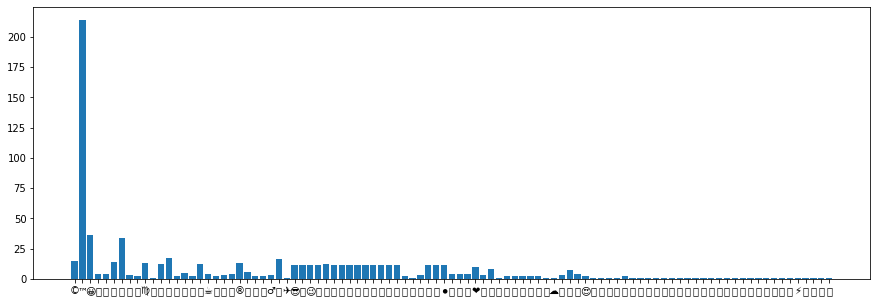

In [129]:
fig= plt.figure(figsize=(15,5))
x = show_name_emoji_count.keys()
y = show_name_emoji_count.values()

plt.bar(x,y)

plt.show()

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128578 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128278 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 129306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 129396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127801 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127925 missing 

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127774 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9994 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128406 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128047 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128165 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127961 missing fr

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 128077 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 128145 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 127793 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 127800 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 127936 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 128584 mis

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 128071 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 129309 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 128080 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 127785 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 10071 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 129430 miss

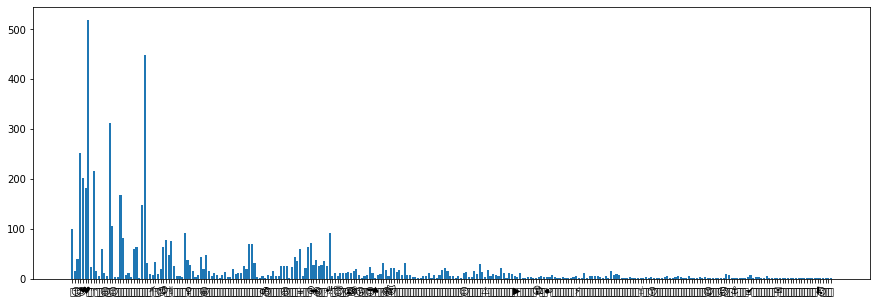

In [130]:
fig= plt.figure(figsize=(15,5))
x = show_desc_emoji_count.keys()
y = show_desc_emoji_count.values()

plt.bar(x,y)

plt.show()

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 129416 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128239 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127766 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 129512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127941 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 129382 missing 

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 129391 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 129388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128202 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128721 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127805 missing 

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 127979 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 127473 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 127479 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 128164 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 10134 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 128048 miss

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 128195 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 127471 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 128261 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 128313 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 128312 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 128137 mis

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 128029 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 127780 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 127874 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 129326 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 129355 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 129473 mis

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 127974 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 128577 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 127761 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 9196 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 128673 missing from current font.
  font.load_char(ord(s), flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 127962 missi

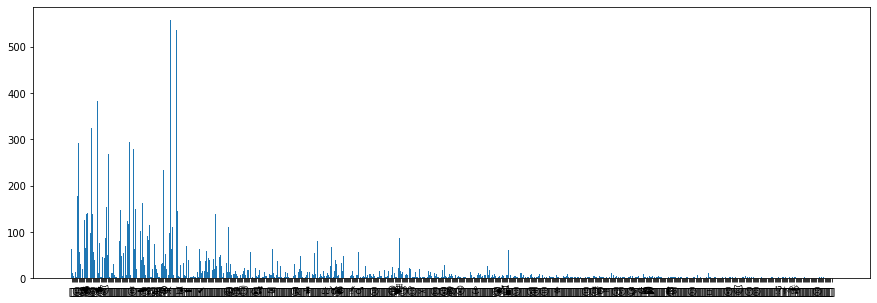

In [131]:
fig= plt.figure(figsize=(15,5))
x = episode_desc_emoji_count.keys()
y = episode_desc_emoji_count.values()

plt.bar(x,y)

plt.show()